In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib.tri import Triangulation
def triangulation_for_triheatmap(M, N):
    xv, yv = np.meshgrid(np.arange(-0.5, M), np.arange(-0.5, N))  # vertices of the little squares
    xc, yc = np.meshgrid(np.arange(0, M), np.arange(0, N))  # centers of the little squares
    x = np.concatenate([xv.ravel(), xc.ravel()])
    y = np.concatenate([yv.ravel(), yc.ravel()])
    cstart = (M + 1) * (N + 1)  # indices of the centers

    trianglesN = [(i + j * (M + 1), i + 1 + j * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    trianglesE = [(i + 1 + j * (M + 1), i + 1 + (j + 1) * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    trianglesS = [(i + 1 + (j + 1) * (M + 1), i + (j + 1) * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    trianglesW = [(i + (j + 1) * (M + 1), i + j * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    return [Triangulation(x, y, triangles) for triangles in [trianglesN, trianglesE, trianglesS, trianglesW]]

In [3]:
#### data
# Load the arrays from the npz file
data = np.load('.\Interresult\heatmap_solar_summer.npz')

m_joint = data ['m_joint']
m_disjoint = data ['m_disjoint']
m_single = data ['m_single']
m_joint_noArb = data ['m_joint_noArb']
valueWind = data ['valueWind']
valueWind_noArb = data ['valueWind_noArb']
value_arbitrager = data ['value_arbitrager']

In [4]:
print(value_arbitrager.flatten())

[ 2.73378893  2.67499731  2.61634656  2.55831768  2.50264981  2.45176925
  2.40580719  2.36476365  2.3286386   5.36330596  5.24527208  5.12737906
  5.01010793  4.89519781  4.78507499  4.67987067  4.57958487  4.48421755
  7.8960428   7.71976115  7.54373037  7.36843165  7.19560399  7.02767372
  6.86477206  6.70689899  6.55405453 10.35576642 10.12207198  9.88862841
  9.65591684  9.42567635  9.20033327  8.98001878  8.7647329   8.55447561
 12.75003115 12.45809565 12.16652883 11.87581176 11.58768356 11.30457051
 11.02660384 10.75378351 10.48609659 15.09042266 14.73973654 14.38941909
 14.03995137 13.69307252 13.35120883 13.01449149 12.68292052 12.35666804
 17.38155302 16.97211632 16.56304829 16.15482998 15.74920052 15.34858622
 14.95311835 14.56395137 14.19015902 19.62412037 19.15593311 18.68811451
 18.22114565 17.75676565 17.2974008  16.84618952 16.41175386 15.99462991
 21.81820498 21.29126714 20.76469796 20.23897852 19.7158479  19.20346255
 18.7083836  18.23061636 17.77016083]


In [5]:
storage_choice = np.arange(0.2, 2, 0.2)*1000
storage_choice=storage_choice.astype(int)
RES_choice = np.arange(0.2, 2, 0.2)*1000
RES_choice =RES_choice.astype(int)
value_df = pd.DataFrame({'Storage Capacity (MW)': np.repeat(storage_choice, len(RES_choice)),
                   'Solar Capacity (MW)': np.tile(storage_choice, len(RES_choice))})
valueWind = np.round(valueWind*1000, decimals=2)
valueWind_noArb = np.round(valueWind_noArb*1000, decimals=1)
value_arbitrager = np.round(value_arbitrager*1000, decimals=1)
value_df['RES'] = valueWind.flatten()
value_df['arbitrager'] = value_arbitrager.flatten()
value_df['Gap (RES-arbitrager)'] = (valueWind-value_arbitrager).flatten()
value_df['Gap (RES_noArb-arbitrager)'] = (valueWind_noArb-value_arbitrager).flatten()
value_df.head()

,Storage Capacity (MW),Solar Capacity (MW),RES,arbitrager,Gap (RES-arbitrager),Gap (RES_noArb-arbitrager)
0,200,200,2675.00,2733.8,-58.80,-1124.7
1,200,400,2558.32,2675.0,-116.68,-1147.6
2,200,600,2451.77,2616.3,-164.53,-1167.4
3,200,800,2364.76,2558.3,-193.54,-1171.3
4,200,1000,2297.43,2502.6,-205.17,-1157.8


C:\Users\GU Nan\AppData\Local\Temp\ipykernel_12100\3493083979.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,2,1)


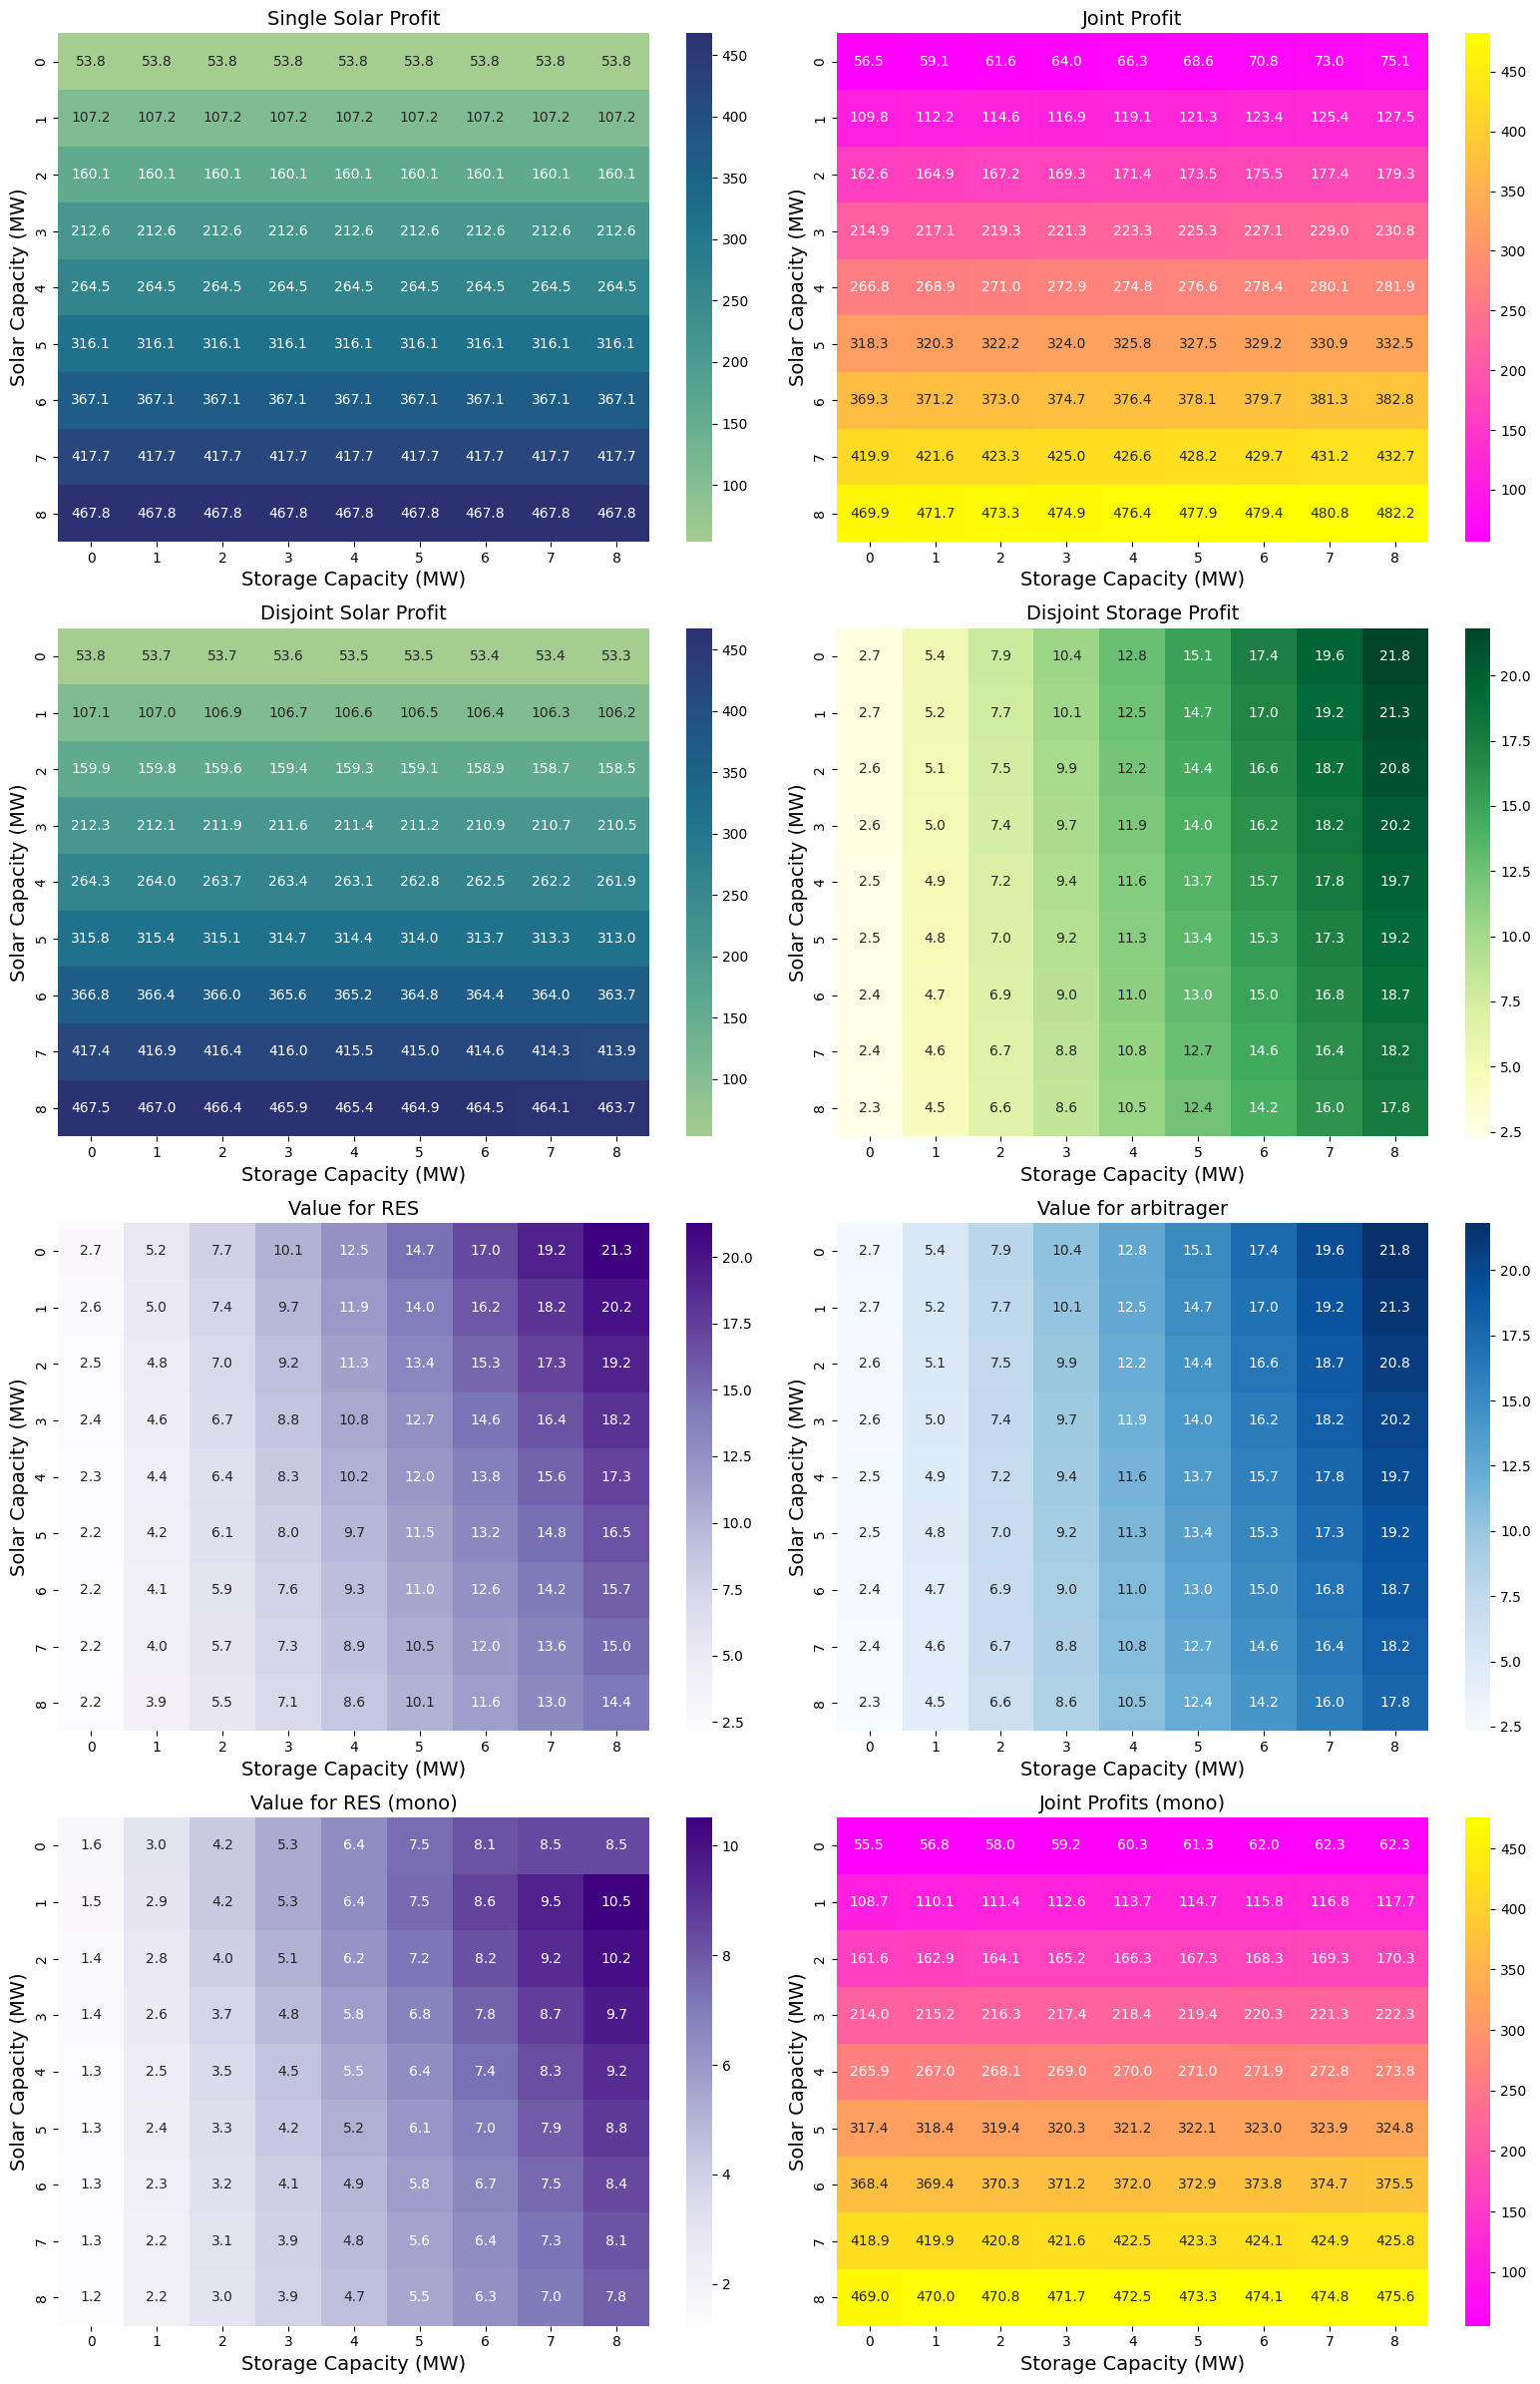

In [6]:
# RES_heatmap = value_df.pivot("Storage Capacity (MW)", "Solar Capacity (MW)", "RES")
plt.subplots(figsize=(16, 24))
plt.subplot(4,2,1)
sns.heatmap(np.round(m_single.T, decimals=1), cmap="crest",annot = True, fmt=".1f")
plt.xlabel('Storage Capacity (MW)', fontsize = 14)
plt.ylabel('Solar Capacity (MW)', fontsize = 14)
plt.title('Single Solar Profit', fontsize = 14)
plt.subplot(4,2,2)
sns.heatmap(np.round(m_joint.T, decimals=1), cmap="spring",annot = True, fmt=".1f")
plt.xlabel('Storage Capacity (MW)', fontsize = 14)
plt.ylabel('Solar Capacity (MW)', fontsize = 14)
plt.title('Joint Profit', fontsize = 14)
plt.subplot(4,2,3)
sns.heatmap(np.round(m_disjoint.T-value_arbitrager.T/1000, decimals=1), cmap="crest",annot = True, fmt=".1f")
plt.xlabel('Storage Capacity (MW)', fontsize = 14)
plt.ylabel('Solar Capacity (MW)', fontsize = 14)
plt.title('Disjoint Solar Profit', fontsize = 14)
plt.subplot(4,2,4)
sns.heatmap(value_arbitrager.T/1000, cmap="YlGn",annot = True, fmt=".1f")
plt.xlabel('Storage Capacity (MW)', fontsize = 14)
plt.ylabel('Solar Capacity (MW)', fontsize = 14)
plt.title('Disjoint Storage Profit', fontsize = 14)
plt.subplot(4,2,5)
sns.heatmap(m_joint.T-m_single.T, cmap="Purples",annot = True, fmt=".1f")
plt.xlabel('Storage Capacity (MW)', fontsize = 14)
plt.ylabel('Solar Capacity (MW)', fontsize = 14)
plt.title('Value for RES', fontsize = 14)
plt.subplot(4,2,6)
sns.heatmap(value_arbitrager.T/1000, cmap="Blues",annot = True, fmt=".1f")
plt.xlabel('Storage Capacity (MW)', fontsize = 14)
plt.ylabel('Solar Capacity (MW)', fontsize = 14)
plt.title('Value for arbitrager', fontsize = 14)
plt.subplot(4,2,7)
sns.heatmap(m_joint_noArb.T-m_single.T, cmap="Purples",annot = True, fmt=".1f")
plt.xlabel('Storage Capacity (MW)', fontsize = 14)
plt.ylabel('Solar Capacity (MW)', fontsize = 14)
plt.title('Value for RES (mono)', fontsize = 14)
plt.subplot(4,2,8)
sns.heatmap(m_joint_noArb.T, cmap="spring",annot = True, fmt=".1f")
plt.xlabel('Storage Capacity (MW)', fontsize = 14)
plt.ylabel('Solar Capacity (MW)', fontsize = 14)
plt.title('Joint Profits (mono)', fontsize = 14)
plt.tight_layout()
plt.savefig(".\pics\ALL_heatmap_solar_summer.pdf")

In [7]:
df_piv = value_df.pivot_table(index='Solar Capacity (MW)', columns='Storage Capacity (MW)')
M = len(df_piv.columns) // 4
N = len(df_piv)
values = [df_piv[dir] for dir in
          ['RES', 'arbitrager', 'Gap (RES-arbitrager)', 'Gap (RES_noArb-arbitrager)']]  
triangul = triangulation_for_triheatmap(M, N)
cmaps = ['Purples', 'Blues', 'summer', 'Wistia']
# norms = [plt.Normalize(np.min(valueWind), np.max(valueWind))] +[plt.Normalize(np.min(value_arbitrager), np.max(value_arbitrager))] + [plt.Normalize(np.min(valueWind-value_arbitrager), np.max(valueWind-value_arbitrager))]+ [plt.Normalize(np.min(valueWind_noArb-value_arbitrager), np.max(valueWind_noArb-value_arbitrager))]


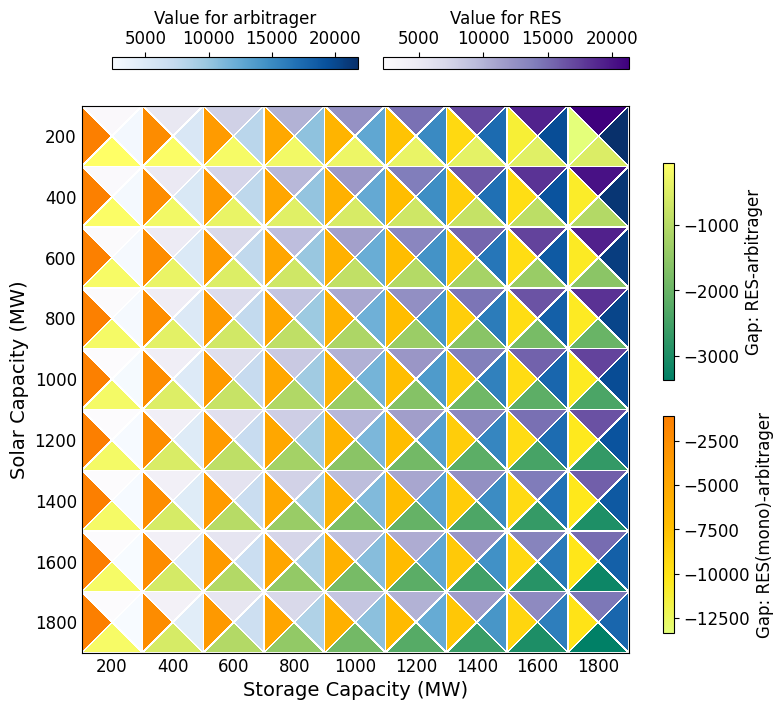

In [8]:
norms = [plt.Normalize(np.min(valueWind), np.max(valueWind))] +[plt.Normalize(np.min(value_arbitrager), np.max(value_arbitrager))] + [plt.Normalize(np.min(valueWind-value_arbitrager), np.max(valueWind-value_arbitrager))]+ [plt.Normalize(np.min(valueWind_noArb-value_arbitrager), np.max(valueWind_noArb-value_arbitrager))]
fig, ax = plt.subplots(figsize=(8, 8))
imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmap, norm=norm, ec='white')
        for t, val, cmap, norm in zip(triangul, values, cmaps, norms)]

ax.tick_params(length=0)
ax.set_xticks(range(M))
ax.set_xticklabels(df_piv['RES'].columns)
ax.set_yticks(range(N))
ax.set_yticklabels(df_piv.index)
ax.invert_yaxis()
ax.margins(x=0, y=0)
ax.set_aspect('equal', 'box')  # square cells

# axins = inset_axes(plt.gca(),width="100%",  height="5%",loc='lower right', borderpad=2.3)

cbar_3 = plt.colorbar(imgs[3], ax=ax, location='right', shrink=0.3, pad = -0.15, anchor = (0.0,0.1))
cbar_3.set_label('Gap: RES(mono)-arbitrager', fontsize = 12)
cbar_2 = plt.colorbar(imgs[2], ax=ax, location='right', shrink=0.3, anchor = (0.0,0.6))
cbar_2.set_label('Gap: RES-arbitrager', fontsize = 12)
cbar_2.ax.set_position(cbar_3.ax.get_position())
cbar_1 = plt.colorbar(imgs[1], ax=ax, location='top', shrink=0.45, pad = -0.15, anchor = (0.1,0.0))
cbar_1.set_label('Value for arbitrager', fontsize = 12)
cbar_0 = plt.colorbar(imgs[0], ax=ax, location='top', shrink=0.45, anchor = (1.0,0.0))
cbar_0.set_label('Value for RES', fontsize = 12)
cbar_0.ax.set_position(cbar_1.ax.get_position())
cbar_0.ax.tick_params(labelsize=12)  # Set the desired font size
cbar_1.ax.tick_params(labelsize=12)  # Set the desired font size
cbar_2.ax.tick_params(labelsize=12)  # Set the desired font size
cbar_3.ax.tick_params(labelsize=12)  # Set the desired font size
plt.xlabel('Storage Capacity (MW)', fontsize = 14)
plt.ylabel('Solar Capacity (MW)', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(".\pics\heatmap_solar_summer.pdf")
plt.show()

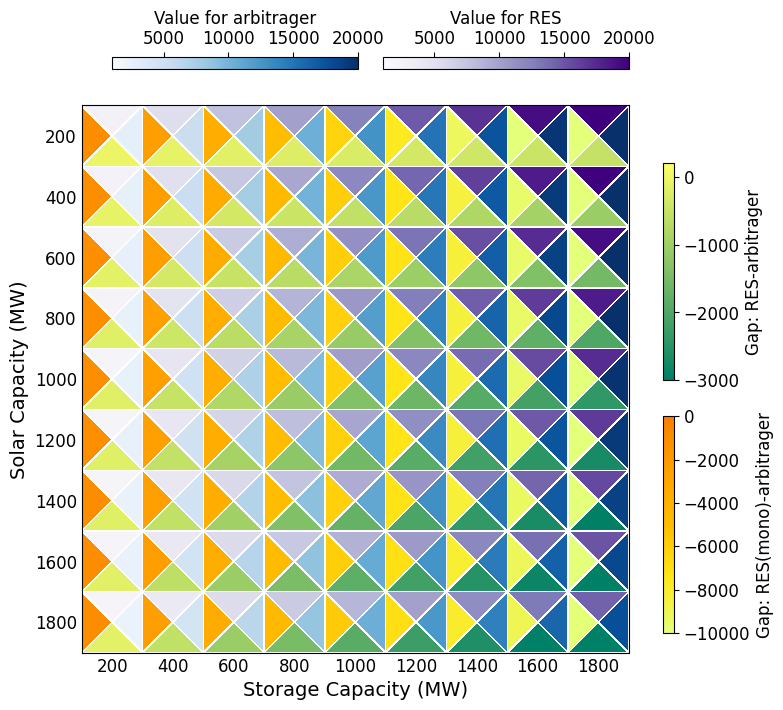

In [9]:
norms = [plt.Normalize(1000, 20000)] +[plt.Normalize(1000, 20000)] + [plt.Normalize(-3000,200)]+ [plt.Normalize(-10000,0)]
fig, ax = plt.subplots(figsize=(8, 8))
imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmap, norm=norm, ec='white')
        for t, val, cmap, norm in zip(triangul, values, cmaps, norms)]

ax.tick_params(length=0)
ax.set_xticks(range(M))
ax.set_xticklabels(df_piv['RES'].columns)
ax.set_yticks(range(N))
ax.set_yticklabels(df_piv.index)
ax.invert_yaxis()
ax.margins(x=0, y=0)
ax.set_aspect('equal', 'box')  # square cells

# axins = inset_axes(plt.gca(),width="100%",  height="5%",loc='lower right', borderpad=2.3)

cbar_3 = plt.colorbar(imgs[3], ax=ax, location='right', shrink=0.3, pad = -0.15, anchor = (0.0,0.1))
cbar_3.set_label('Gap: RES(mono)-arbitrager', fontsize = 12)
cbar_2 = plt.colorbar(imgs[2], ax=ax, location='right', shrink=0.3, anchor = (0.0,0.6))
cbar_2.set_label('Gap: RES-arbitrager', fontsize = 12)
cbar_2.ax.set_position(cbar_3.ax.get_position())
cbar_1 = plt.colorbar(imgs[1], ax=ax, location='top', shrink=0.45, pad = -0.15, anchor = (0.1,0.0))
cbar_1.set_label('Value for arbitrager', fontsize = 12)
cbar_0 = plt.colorbar(imgs[0], ax=ax, location='top', shrink=0.45, anchor = (1.0,0.0))
cbar_0.set_label('Value for RES', fontsize = 12)
cbar_0.ax.set_position(cbar_1.ax.get_position())
cbar_0.ax.tick_params(labelsize=12)  # Set the desired font size
cbar_1.ax.tick_params(labelsize=12)  # Set the desired font size
cbar_2.ax.tick_params(labelsize=12)  # Set the desired font size
cbar_3.ax.tick_params(labelsize=12)  # Set the desired font size
plt.xlabel('Storage Capacity (MW)', fontsize = 14)
plt.ylabel('Solar Capacity (MW)', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(".\pics\heatmap_solar_summer_1.pdf")
plt.show()

In [10]:



# days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
# df = pd.DataFrame({'cols': np.random.choice([*'abcdefghij'], 40),
#                    'rows': np.random.choice(days, 40),
#                    'north': np.random.rand(40),
#                    'east': np.random.rand(40),
#                    'south': np.random.rand(40),
#                    'west': np.random.rand(40)})
# df['rows'] = pd.Categorical(df['rows'], categories=days)  # fix an ordering
# df_piv = df.pivot_table(index='rows', columns='cols')
# M = len(df_piv.columns) // 4
# N = len(df_piv)
# values = [df_piv[dir] for dir in
#           ['north', 'east', 'south', 'west']]  # these are the 4 column names in df

# triangul = triangulation_for_triheatmap(M, N)
# cmaps = ['RdYlBu'] * 4
# norms = [plt.Normalize(0, 1) for _ in range(4)]
# fig, ax = plt.subplots(figsize=(10, 4))
# imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmap, norm=norm, ec='white')
#         for t, val, cmap, norm in zip(triangul, values, cmaps, norms)]

# ax.tick_params(length=0)
# ax.set_xticks(range(M))
# ax.set_xticklabels(df_piv['north'].columns)
# ax.set_yticks(range(N))
# ax.set_yticklabels(df_piv.index)
# ax.invert_yaxis()
# ax.margins(x=0, y=0)
# ax.set_aspect('equal', 'box')  # square cells
# plt.colorbar(imgs[0], ax=ax)
# plt.tight_layout()
# plt.show()